In [1]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set()

In [34]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf = datadf[datadf['is_personal']==1]
# datadf.head()

In [36]:
timedata = pd.read_csv('All Data/Raw Journey Data/TimeDataUntil16May2020.csv')
timedata = timedata.set_index(timedata.columns[0])
timedata = timedata.loc[datadf.index] # only personal entries
# timedata.head()

In [37]:
drop_cols = ['text','date_modified','address','mood','favourite','weather','photos']
datadf = datadf.drop(columns = drop_cols)

In [38]:
tidy_format = pd.read_csv('All Data/Raw Journey Data/TidyFormatUntil16May2020.csv')

In [39]:
words = ['ibd','dramebaaz','theatre','theater','acting','actor']

In [40]:
tidy_format['mentioned(entry)'] = tidy_format['lower'].isin(words).astype(int)

In [41]:
tidy_format[tidy_format['mentioned(entry)']==1].id

1178      1439198245820-3fda14add91e3f20
20976     1457961282703-3fd7128306b18fbe
24076     1460056719920-3fd6b5eecc7904d4
34195     1479386291847-3fe65baa5ca77911
34359     1479386291847-3fe65baa5ca77911
                       ...              
267008    1588354752808-3fecfbbe72fd40d4
267060    1588354752808-3fecfbbe72fd40d4
268467    1588868368101-3fe68deb9d333643
268767    1589006192322-3fd69b28692b0b76
269050    1589157691620-3fe97206cd800483
Name: id, Length: 185, dtype: object

In [42]:
tidy_format

,id,num,word,lower,mentioned(entry)
0,1439137473084-3fc756cc3f8d6404,0,The,the,0
1,1439137473084-3fc756cc3f8d6404,1,first,first,0
2,1439137473084-3fc756cc3f8d6404,2,thing,thing,0
3,1439137473084-3fc756cc3f8d6404,3,I,i,0
4,1439137473084-3fc756cc3f8d6404,4,saw,saw,0
...,...,...,...,...,...
269734,1589680083127-3fd337d30df0a5ce,112,story,story,0
269735,1589680083127-3fd337d30df0a5ce,113,is,is,0
269736,1589680083127-3fd337d30df0a5ce,114,above,above,0
269737,1589680083127-3fd337d30df0a5ce,115,ALL,all,0


In [44]:
words_found = tidy_format.merge(timedata, on='id', how='right')[['mentioned(entry)','day_num','month_num', 'year_month','month']]
words_found_days = words_found.groupby('day_num').agg(func={'mentioned(entry)':'sum', 'month_num':'first', 'year_month':'first', 'month':'first'})
words_found_days['mentioned(day)'] = (words_found_days['mentioned(entry)']!=0).astype(int)
words_found_days

,mentioned(entry),month_num,year_month,month,mentioned(day)
day_num,,,,,
0,0.0,0,2015 aug,8,0
1,1.0,0,2015 aug,8,1
113,0.0,3,2015 nov,11,0
193,0.0,6,2016 feb,2,0
202,0.0,6,2016 feb,2,0
...,...,...,...,...,...
1738,0.0,57,2020 may,5,0
1739,0.0,57,2020 may,5,0
1740,0.0,57,2020 may,5,0


In [45]:
words_found_monthly = words_found_days.groupby('month').mean()[['mentioned(entry)']]
words_found_monthly 

,mentioned(entry)
month,
1,0.160000
2,0.129870
3,0.148649
4,0.091954
5,0.141026
6,0.104167
7,0.054545
8,0.072727
9,0.019608


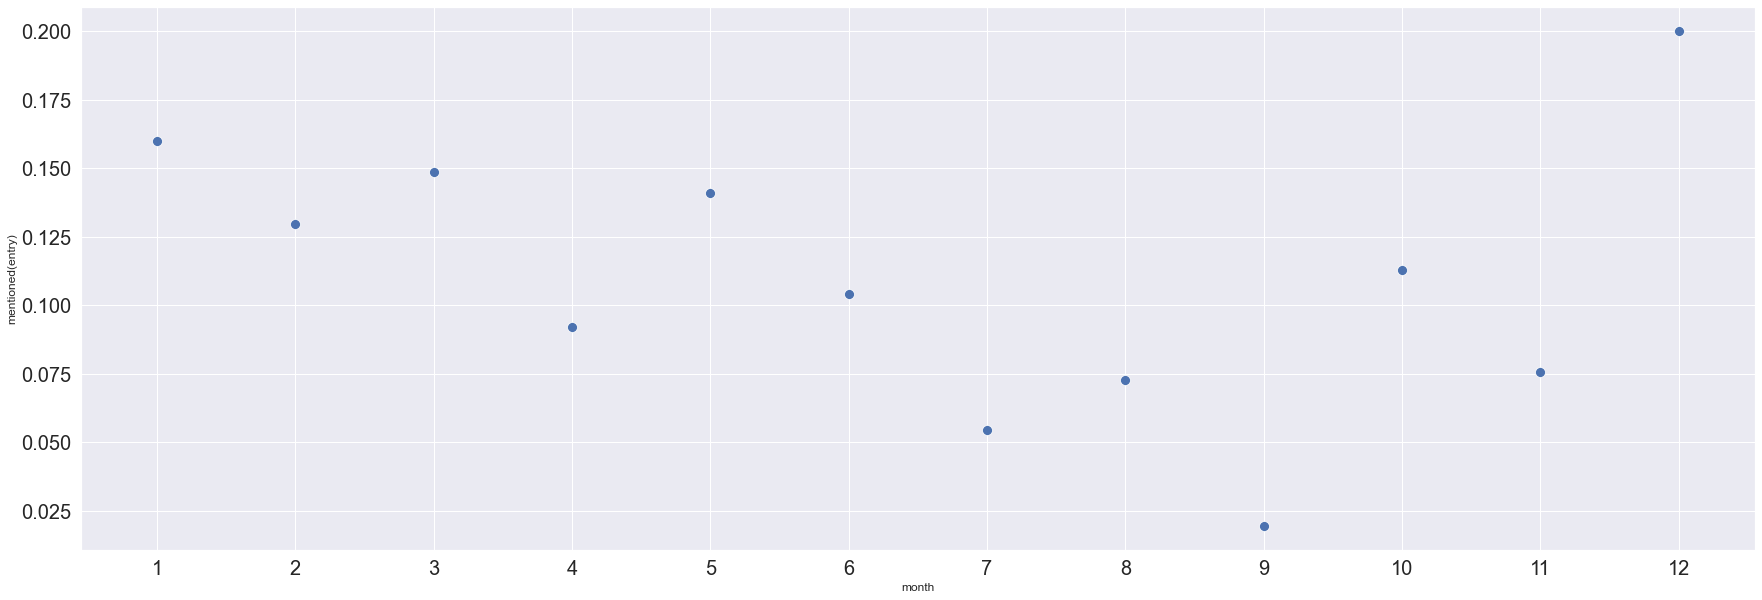

In [46]:
plt.figure(figsize=(30,10))
sns.scatterplot(words_found_monthly.index,words_found_monthly['mentioned(entry)'], s=100)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.locator_params(axis='x', nbins=20)

# how do I tell if any month has significantly more mentions? I have data for many years, is just summing them good enough?